In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-24 19:15:44.580392: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 19:15:44.901454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 19:15:45.601330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/RJ_Reconstrucao_Pleuronectiformes_2024_08_20.xlsx')

df_Linguado = pd.DataFrame(df[['Ano','Linguado_art','Linguado_ind','Linguado_art_ind']])

#Somando art e ind em art_ind
for i in range(len(df_Linguado['Ano'])):
  if pd.isnull(df_Linguado.iloc[i,3])==True and pd.isnull(df_Linguado.iloc[i,2])==False and pd.isnull(df_Linguado.iloc[i,1])==False:
    df_Linguado.iloc[i,3] = df_Linguado.iloc[i,2] + df_Linguado.iloc[i,1] 


dados = df_Linguado[['Ano','Linguado_art','Linguado_art_ind']].dropna().reset_index(drop=True)

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Linguado_art'] = dados.loc[i,'Linguado_art'] / dados.loc[i,'Linguado_art_ind']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()



prop = dados['Prop_Linguado_art'].values

dados.head()

,Ano,Linguado_art,Linguado_art_ind,Prop_Linguado_art
0,1978,571.0,581.0,0.982788
1,1979,44.0,50.0,0.880000
2,1980,56.0,62.0,0.903226
3,1981,30.0,51.0,0.588235
4,1982,54.0,81.0,0.666667


In [15]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [17]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=300, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado/pesos prop art/.weights.h5', overwrite=True)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - loss: 1.0124
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9602
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9148
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8697
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8209
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7678
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7100
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6486
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5840
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5205
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4629
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4179
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3924
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3858
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3957
Epoch 16/300
1/1 ━

In [18]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado/pesos prop art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[1.]
 [1.]]


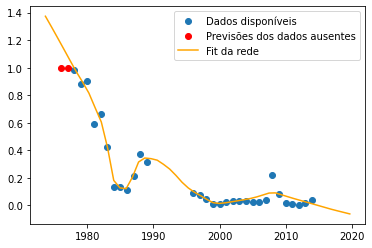

In [19]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

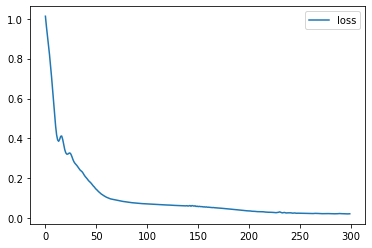

In [20]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [21]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_preenchido = df[['Ano','Linguado_art']]
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
      df_preenchido.loc[i,'Linguado_art']=df.loc[i,'Linguado_art_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado/Previsão Linguado_art.xlsx')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
     Ano  Linguado_art
0   1950           NaN
1   1951           NaN
2   1952           NaN
3   1953           NaN
4   1954           NaN
5   1955           NaN
6   1956           NaN
7   1957           NaN
8   1958           NaN
9   1959           NaN
10  1960           NaN
11  1961           NaN
12  1962           NaN
13  1963           NaN
14  1964           NaN
15  1965           NaN
16  1966           NaN
17  1967           NaN
18  1968           NaN
19  1969           NaN
20  1970           NaN
21  1971           NaN
22  1972           NaN
23  1973           NaN
24  1974           NaN
25  1975           NaN
26  1976        62.000
27  1977       435.000
28  1978       571.000
29  1979        44.000
30  1980        56.000
31  1981        30.000
32  1982        54.000
33  1983        47.000
34  1984        26.000
35  1985        34.000
36  1986        22.000
37  1987        29.000
38  1988        52.000
39  1989        58.000
40  1990           

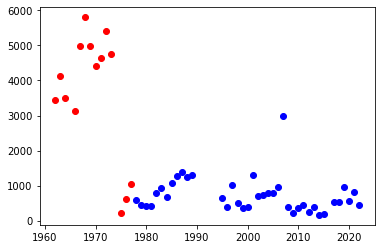

In [8]:
for i in range(len(df_preenchido['Ano'])):
  if i+1950 in anos_para_prever:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Corvina_art'].values[i],color='red')
  else:
    plt.scatter(df_preenchido['Ano'].values[i],df_preenchido['Corvina_art'].values[i],color='blue')